In [26]:
pip install pandas numpy matplotlib seaborn jupyter scikit-learn pdfplumber


[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# County Gen Dataset

In [3]:
print('hi')

hi


In [27]:
import pdfplumber
import pandas as pd
import re

with pdfplumber.open("UtilRenewGenTypeCnty2022.pdf") as pdf:
    page = pdf.pages[1]
    lines = page.extract_text().split("\n")

rows = []
for line in lines:
    # skip empty or non-data lines
    if not line.strip():
        continue

    # split into tokens
    parts = line.split()

    # find where numbers or dashes start (first numeric token or '-')
    for i, token in enumerate(parts):
        if re.match(r"^[-\d,]+$", token):  # a number or dash
            split_index = i
            break
    else:
        continue  # skip if no numeric data found

    # everything before that is the county name
    county = " ".join(parts[:split_index])
    numbers = parts[split_index:]

    # combine back into a single row
    rows.append([county] + numbers)

# Convert to DataFrame
df = pd.DataFrame(rows)

# Optional: clean up and replace dashes/commas
df = df.replace("-", '0').replace(",", "", regex=True)

df


,0,1,2,3,4,5,6,7
0,Alameda,114,0,0,29,0,869,1012
1,Amador,0,0,76,2,0,0,78
2,Butte,14,0,165,15,0,0,194
3,Calaveras,0,0,96,3,0,0,99
4,Colusa,145,0,0,0,0,0,145
5,Contra Costa,24,0,0,70,0,99,194
6,El Dorado,0,0,104,0,0,0,104
7,Fresno,138,0,19,2173,0,0,2330
8,Glenn,0,0,5,4,0,0,8
9,Humboldt,143,0,0,16,0,0,158


In [28]:
# Combine "Small Hydro", "Solar Photovoltaic", and "Solar Thermal"
new_columns = [
    "County",
    "Biomass",
    "Geothermal",
    "Small Hydro",
    "Solar Photovoltaic",
    "Solar Thermal",
    "Wind",
    "Total"
]

# Apply the new column names
df_new = pd.DataFrame(columns=new_columns)

df_new['County'] = df[0]
df_new['Biomass'] = df[1]
df_new['Geothermal'] = df[2]
df_new['Small Hydro'] = df[3]
df_new['Solar Photovoltaic'] = df[4]
df_new['Solar Thermal'] = df[5]
df_new['Wind'] = df[6]
df_new['Total'] = df[7]

df_new

,County,Biomass,Geothermal,Small Hydro,Solar Photovoltaic,Solar Thermal,Wind,Total
0,Alameda,114,0,0,29,0,869,1012
1,Amador,0,0,76,2,0,0,78
2,Butte,14,0,165,15,0,0,194
3,Calaveras,0,0,96,3,0,0,99
4,Colusa,145,0,0,0,0,0,145
5,Contra Costa,24,0,0,70,0,99,194
6,El Dorado,0,0,104,0,0,0,104
7,Fresno,138,0,19,2173,0,0,2330
8,Glenn,0,0,5,4,0,0,8
9,Humboldt,143,0,0,16,0,0,158


In [29]:
county_gen = df_new.copy()
county_gen.head()

,County,Biomass,Geothermal,Small Hydro,Solar Photovoltaic,Solar Thermal,Wind,Total
0,Alameda,114,0,0,29,0,869,1012
1,Amador,0,0,76,2,0,0,78
2,Butte,14,0,165,15,0,0,194
3,Calaveras,0,0,96,3,0,0,99
4,Colusa,145,0,0,0,0,0,145


# County Cap Dataset

In [30]:
import pdfplumber
import pandas as pd
import re

with pdfplumber.open("UtilRenewCapTypeCnty2022.pdf") as pdf:
    page = pdf.pages[1]
    lines = page.extract_text().split("\n")

rows = []
for line in lines:
    # skip empty or non-data lines
    if not line.strip():
        continue

    # split into tokens
    parts = line.split()

    # find where numbers or dashes start (first numeric token or '-')
    for i, token in enumerate(parts):
        if re.match(r"^[-\d,]+$", token):  # a number or dash
            split_index = i
            break
    else:
        continue  # skip if no numeric data found

    # everything before that is the county name
    county = " ".join(parts[:split_index])
    numbers = parts[split_index:]

    # combine back into a single row
    rows.append([county] + numbers)

# Convert to DataFrame
cap = pd.DataFrame(rows)

# Optional: clean up and replace dashes/commas
cap = cap.replace("-", "0").replace(",", "", regex=True)

cap.head()


,0,1,2,3,4,5,6,7
0,Alameda,22,0,0,18,0,286,325
1,Amador,23,0,14,2,0,0,38
2,Butte,2,0,68,11,0,0,81
3,Calaveras,0,0,32,2,0,0,33
4,Colusa,29,0,0,0,0,0,29


In [31]:
# Combine "Small Hydro", "Solar Photovoltaic", and "Solar Thermal"
new_columns = [
    "County",
    "Biomass",
    "Geothermal",
    "Small Hydro",
    "Solar Photovoltaic",
    "Solar Thermal",
    "Wind",
    "Total"
]

# Apply the new column names
df_new2 = pd.DataFrame(columns=new_columns)

df_new2['County'] = cap[0]
df_new2['Biomass'] = cap[1]
df_new2['Geothermal'] = cap[2]
df_new2['Small Hydro'] = cap[3]
df_new2['Solar Photovoltaic'] = cap[4]
df_new2['Solar Thermal'] = cap[5]
df_new2['Wind'] = cap[6]
df_new2['Total'] = cap[7]

df_new2.head()

,County,Biomass,Geothermal,Small Hydro,Solar Photovoltaic,Solar Thermal,Wind,Total
0,Alameda,22,0,0,18,0,286,325
1,Amador,23,0,14,2,0,0,38
2,Butte,2,0,68,11,0,0,81
3,Calaveras,0,0,32,2,0,0,33
4,Colusa,29,0,0,0,0,0,29


In [32]:
county_cap = df_new2.copy()
county_cap.head()

,County,Biomass,Geothermal,Small Hydro,Solar Photovoltaic,Solar Thermal,Wind,Total
0,Alameda,22,0,0,18,0,286,325
1,Amador,23,0,14,2,0,0,38
2,Butte,2,0,68,11,0,0,81
3,Calaveras,0,0,32,2,0,0,33
4,Colusa,29,0,0,0,0,0,29


In [33]:
hours_in_year = 8760  # 24*365

energy_cols = ['Biomass', 'Geothermal', 'Small Hydro', 
               'Solar Photovoltaic', 'Solar Thermal', 'Wind', 'Total']

for col in energy_cols:
    county_cap[energy_cols] = county_cap[energy_cols].astype('Int64')
    county_cap[col + '_GWh'] = county_cap[col] * hours_in_year / 1000  # MW → GWh/year

county_cap.head()


,County,Biomass,Geothermal,Small Hydro,Solar Photovoltaic,Solar Thermal,Wind,Total,Biomass_GWh,Geothermal_GWh,Small Hydro_GWh,Solar Photovoltaic_GWh,Solar Thermal_GWh,Wind_GWh,Total_GWh
0,Alameda,22,0,0,18,0,286,325,192.72,0.0,0.0,157.68,0.0,2505.36,2847.0
1,Amador,23,0,14,2,0,0,38,201.48,0.0,122.64,17.52,0.0,0.0,332.88
2,Butte,2,0,68,11,0,0,81,17.52,0.0,595.68,96.36,0.0,0.0,709.56
3,Calaveras,0,0,32,2,0,0,33,0.0,0.0,280.32,17.52,0.0,0.0,289.08
4,Colusa,29,0,0,0,0,0,29,254.04,0.0,0.0,0.0,0.0,0.0,254.04


# Merging Datasets

In [47]:
queue_data = pd.read_csv('queue_data.csv', header=1)
queue_data['q_date'] = pd.to_datetime(queue_data['q_date'], origin='1899-12-30', unit='D')
queue_data['prop_date'] = pd.to_datetime(queue_data['prop_date'], origin='1899-12-30', unit='D')
queue_data['on_date'] = pd.to_datetime(queue_data['on_date'], origin='1899-12-30', unit='D')
queue_data['wd_date'] = pd.to_datetime(queue_data['wd_date'], origin='1899-12-30', unit='D')
queue_data['ia_date'] = pd.to_datetime(queue_data['ia_date'], origin='1899-12-30', unit='D')
ca_queue_data = queue_data[queue_data['state']=='CA'].reset_index()
ca_queue_data['q_month'] = ca_queue_data['q_date'].dt.month
ca_queue_data['q_day'] = ca_queue_data['q_date'].dt.day
ca_queue_data['q_dayofweek'] = ca_queue_data['q_date'].dt.dayofweek   # Monday=0, Sunday=6
ca_queue_data.drop(columns=['q_date', 'prop_date', 'prop_year', 'IA_status_raw']) #don't need predicted dates, or date in dt format

,index,q_id,q_status,on_date,wd_date,ia_date,IA_status_clean,county,state,county_state_pairs,...,type2,type3,mw1,mw2,mw3,type_clean,q_year,q_month,q_day,q_dayofweek
0,442,Q499,withdrawn,NaT,NaT,NaT,Withdrawn,Riverside,CA,"Riverside, CA",...,NaN,NaN,1300.00,NaN,NaN,Hydro,2023.0,3,22,2
1,520,Q572,active,NaT,NaT,NaT,Cluster Study,Riverside,CA,"Riverside, CA",...,NaN,NaN,1300.00,NaN,NaN,Hydro,2024.0,5,15,2
2,1218,G0547,withdrawn,NaT,NaT,NaT,Withdrawn,Modoc,CA,"Modoc County, CA",...,NaN,NaN,80.00,NaN,NaN,Solar,2016.0,6,20,0
3,1646,G71,withdrawn,NaT,NaT,NaT,Withdrawn,Modoc,CA,"Modoc County, CA",...,NaN,NaN,300.00,NaN,NaN,Other,2001.0,8,17,4
4,1669,G90,withdrawn,NaT,NaT,NaT,Withdrawn,Modoc,CA,"Modoc County, CA",...,NaN,NaN,30.00,NaN,NaN,Geothermal,2001.0,11,29,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2744,36435,1085,withdrawn,NaT,2014-07-17,NaT,System Impact Study,San Bernardino,CA,"SAN BERNARDINO, CA",...,Battery,NaN,860.00,50.000,NaN,Gas+Battery,2014.0,4,30,2
2745,36436,1088,withdrawn,NaT,2015-01-26,NaT,System Impact Study,Riverside,CA,"RIVERSIDE, CA",...,Battery,NaN,860.00,50.000,NaN,Gas+Battery,2014.0,4,30,2
2746,36437,54788,active,NaT,NaT,NaT,Not Started,Alameda,CA,"Alameda, CA",...,Battery,NaN,662.27,497.523,NaN,Gas+Battery,2023.0,4,17,0
2747,36438,955,withdrawn,NaT,2020-04-01,2015-12-09,IA Executed,NaN,CA,NaN,...,NaN,NaN,108.30,NaN,NaN,Gas,2013.0,4,30,1


In [48]:
ca_queue_data = ca_queue_data[ca_queue_data['q_status'] != 'active']
ca_queue_data = ca_queue_data[ca_queue_data['q_status'] != 'suspended']
ca_queue_data[ca_queue_data['q_status'] == 'operational']
ca_queue_data = ca_queue_data.drop(columns=['ia_date', 'type2', 'type3','mw2', 'mw3', 'county_state_pairs', 'project_name', 'fips_codes', 'poi_name'])

In [49]:
ca_queue_data = ca_queue_data.rename(columns={'county':'County'})

In [84]:
q_and_cap = ca_queue_data.merge(county_cap, on='County')
q_and_cap = q_and_cap.drop(columns=['Biomass', 'Geothermal',
       'Small Hydro', 'Solar Photovoltaic', 'Solar Thermal', 'Wind', 'Total'])
q_and_cap.columns

Index(['index', 'q_id', 'q_status', 'q_date', 'prop_date', 'on_date',
       'wd_date', 'IA_status_raw', 'IA_status_clean', 'County', 'state',
       'region', 'utility', 'entity', 'developer', 'cluster', 'service',
       'project_type', 'type1', 'mw1', 'type_clean', 'q_year', 'prop_year',
       'q_month', 'q_day', 'q_dayofweek', 'Biomass_GWh', 'Geothermal_GWh',
       'Small Hydro_GWh', 'Solar Photovoltaic_GWh', 'Solar Thermal_GWh',
       'Wind_GWh', 'Total_GWh'],
      dtype='object')

In [85]:
df = q_and_cap.merge(county_gen, on='County')

In [86]:
df.columns

Index(['index', 'q_id', 'q_status', 'q_date', 'prop_date', 'on_date',
       'wd_date', 'IA_status_raw', 'IA_status_clean', 'County', 'state',
       'region', 'utility', 'entity', 'developer', 'cluster', 'service',
       'project_type', 'type1', 'mw1', 'type_clean', 'q_year', 'prop_year',
       'q_month', 'q_day', 'q_dayofweek', 'Biomass_GWh', 'Geothermal_GWh',
       'Small Hydro_GWh', 'Solar Photovoltaic_GWh', 'Solar Thermal_GWh',
       'Wind_GWh', 'Total_GWh', 'Biomass', 'Geothermal', 'Small Hydro',
       'Solar Photovoltaic', 'Solar Thermal', 'Wind', 'Total'],
      dtype='object')

In [87]:
new_names = ['Biomass_gen', 'Geothermal_gen', 'Small Hydro_gen', 'Solar Photovoltaic_gen',
       'Solar Thermal_gen', 'Wind_gen', 'Total_gen (GWh)']
df.columns = list(df.columns[:-7]) + new_names

In [88]:
df

,index,q_id,q_status,q_date,prop_date,on_date,wd_date,IA_status_raw,IA_status_clean,County,...,Solar Thermal_GWh,Wind_GWh,Total_GWh,Biomass_gen,Geothermal_gen,Small Hydro_gen,Solar Photovoltaic_gen,Solar Thermal_gen,Wind_gen,Total_gen (GWh)
0,442,Q499,withdrawn,2023-03-22,2027-12-01,NaT,NaT,Withdrawn,Withdrawn,Riverside,...,2190.0,5045.76,31798.8,292,0,45,6165,615,1305,8422
1,1681,10,withdrawn,2001-05-02,2009-07-01,NaT,NaT,Executed,IA Executed,Kings,...,0.0,0.0,13613.04,0,0,0,3678,0,0,3678
2,1682,1000,withdrawn,2013-04-30,2019-01-01,NaT,2014-04-24,NaN,System Impact Study,Kern,...,0.0,31325.76,71744.4,186,0,149,10230,0,7869,18434
3,1683,1001,withdrawn,2013-04-30,2016-10-01,NaT,2014-02-27,NaN,System Impact Study,Kings,...,0.0,0.0,13613.04,0,0,0,3678,0,0,3678
4,1685,1003,withdrawn,2013-04-30,2017-01-01,NaT,2014-04-29,NaN,System Impact Study,Kern,...,0.0,31325.76,71744.4,186,0,149,10230,0,7869,18434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1798,36041,Q66,withdrawn,2018-12-28,2021-10-31,NaT,2019-10-15,NaN,Withdrawn,Los Angeles,...,0.0,17.52,15321.24,804,0,89,3022,0,5,3919
1799,36434,206,withdrawn,2007-04-23,2013-01-30,NaT,2007-06-20,NaN,System Impact Study,Los Angeles,...,0.0,17.52,15321.24,804,0,89,3022,0,5,3919
1800,36435,1085,withdrawn,2014-04-30,2020-06-01,NaT,2014-07-17,NaN,System Impact Study,San Bernardino,...,6429.84,61.32,15470.16,0,0,18,2054,1487,7,3566
1801,36436,1088,withdrawn,2014-04-30,2019-06-01,NaT,2015-01-26,NaN,System Impact Study,Riverside,...,2190.0,5045.76,31798.8,292,0,45,6165,615,1305,8422


# EDA

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

df.columns

Index(['index', 'q_id', 'q_status', 'q_date', 'prop_date', 'on_date',
       'wd_date', 'IA_status_raw', 'IA_status_clean', 'County', 'state',
       'region', 'utility', 'entity', 'developer', 'cluster', 'service',
       'project_type', 'type1', 'mw1', 'type_clean', 'q_year', 'prop_year',
       'q_month', 'q_day', 'q_dayofweek', 'Biomass_GWh', 'Geothermal_GWh',
       'Small Hydro_GWh', 'Solar Photovoltaic_GWh', 'Solar Thermal_GWh',
       'Wind_GWh', 'Total_GWh', 'Biomass_gen', 'Geothermal_gen',
       'Small Hydro_gen', 'Solar Photovoltaic_gen', 'Solar Thermal_gen',
       'Wind_gen', 'Total_gen (GWh)', 'days_to_decision', 'acceptance_status'],
      dtype='object')

In [132]:
df["days_to_decision"] = np.where(
    df["on_date"].notna(),                          # if on_date is not null
    (df["on_date"] - df["q_date"]).dt.days,         # → days between q_date and on_date
    (df["wd_date"] - df["q_date"]).dt.days          # else → days between q_date and wd_date
)
df

,index,q_id,q_status,q_date,prop_date,on_date,wd_date,IA_status_raw,IA_status_clean,County,...,Total_GWh,Biomass_gen,Geothermal_gen,Small Hydro_gen,Solar Photovoltaic_gen,Solar Thermal_gen,Wind_gen,Total_gen (GWh),days_to_decision,acceptance_status
0,442,Q499,withdrawn,2023-03-22,2027-12-01,NaT,NaT,Withdrawn,Withdrawn,Riverside,...,31798.8,292,0,45,6165,615,1305,8422,NaN,Unknown
1,1681,10,withdrawn,2001-05-02,2009-07-01,NaT,NaT,Executed,IA Executed,Kings,...,13613.04,0,0,0,3678,0,0,3678,NaN,Unknown
2,1682,1000,withdrawn,2013-04-30,2019-01-01,NaT,2014-04-24,NaN,System Impact Study,Kern,...,71744.4,186,0,149,10230,0,7869,18434,359.0,Not_Accepted
3,1683,1001,withdrawn,2013-04-30,2016-10-01,NaT,2014-02-27,NaN,System Impact Study,Kings,...,13613.04,0,0,0,3678,0,0,3678,303.0,Not_Accepted
4,1685,1003,withdrawn,2013-04-30,2017-01-01,NaT,2014-04-29,NaN,System Impact Study,Kern,...,71744.4,186,0,149,10230,0,7869,18434,364.0,Not_Accepted
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1798,36041,Q66,withdrawn,2018-12-28,2021-10-31,NaT,2019-10-15,NaN,Withdrawn,Los Angeles,...,15321.24,804,0,89,3022,0,5,3919,291.0,Not_Accepted
1799,36434,206,withdrawn,2007-04-23,2013-01-30,NaT,2007-06-20,NaN,System Impact Study,Los Angeles,...,15321.24,804,0,89,3022,0,5,3919,58.0,Not_Accepted
1800,36435,1085,withdrawn,2014-04-30,2020-06-01,NaT,2014-07-17,NaN,System Impact Study,San Bernardino,...,15470.16,0,0,18,2054,1487,7,3566,78.0,Not_Accepted
1801,36436,1088,withdrawn,2014-04-30,2019-06-01,NaT,2015-01-26,NaN,System Impact Study,Riverside,...,31798.8,292,0,45,6165,615,1305,8422,271.0,Not_Accepted


In [133]:
def classify_acceptance(row):
    """
    Classify if project was accepted within 1 year
    """
    if pd.isna(row['days_to_decision']) or row['days_to_decision'] < 0:
        return 'Unknown'
    
    status = str(row['q_status']).lower()
    
    # Accepted statuses
    if 'operational' in status:
        if row['days_to_decision'] <= (365*5):
            return 'Accepted_Within_5Years'
        else:
            return 'Accepted_Over_5Years'
    
    # Rejected/Withdrawn
    elif 'withdrawn' in status:
        return 'Not_Accepted'
    
    # In progress
    else:
        return 'Pending'

df['acceptance_status'] = df.apply(classify_acceptance, axis=1)

print("\nAcceptance Status Distribution:")
print(df['acceptance_status'].value_counts())


Acceptance Status Distribution:
acceptance_status
Not_Accepted              1505
Accepted_Over_5Years       129
Unknown                     92
Accepted_Within_5Years      77
Name: count, dtype: int64


In [134]:
solar_df = df.copy()
solar_df.columns
cols_to_conv = ['Biomass_gen', 'Geothermal_gen',
       'Small Hydro_gen', 'Solar Photovoltaic_gen', 'Solar Thermal_gen',
       'Wind_gen', 'Total_gen (GWh)', 'days_to_decision']

solar_df[cols_to_conv] = solar_df[cols_to_conv].astype('float64')
solar_df

,index,q_id,q_status,q_date,prop_date,on_date,wd_date,IA_status_raw,IA_status_clean,County,...,Total_GWh,Biomass_gen,Geothermal_gen,Small Hydro_gen,Solar Photovoltaic_gen,Solar Thermal_gen,Wind_gen,Total_gen (GWh),days_to_decision,acceptance_status
0,442,Q499,withdrawn,2023-03-22,2027-12-01,NaT,NaT,Withdrawn,Withdrawn,Riverside,...,31798.8,292.0,0.0,45.0,6165.0,615.0,1305.0,8422.0,NaN,Unknown
1,1681,10,withdrawn,2001-05-02,2009-07-01,NaT,NaT,Executed,IA Executed,Kings,...,13613.04,0.0,0.0,0.0,3678.0,0.0,0.0,3678.0,NaN,Unknown
2,1682,1000,withdrawn,2013-04-30,2019-01-01,NaT,2014-04-24,NaN,System Impact Study,Kern,...,71744.4,186.0,0.0,149.0,10230.0,0.0,7869.0,18434.0,359.0,Not_Accepted
3,1683,1001,withdrawn,2013-04-30,2016-10-01,NaT,2014-02-27,NaN,System Impact Study,Kings,...,13613.04,0.0,0.0,0.0,3678.0,0.0,0.0,3678.0,303.0,Not_Accepted
4,1685,1003,withdrawn,2013-04-30,2017-01-01,NaT,2014-04-29,NaN,System Impact Study,Kern,...,71744.4,186.0,0.0,149.0,10230.0,0.0,7869.0,18434.0,364.0,Not_Accepted
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1798,36041,Q66,withdrawn,2018-12-28,2021-10-31,NaT,2019-10-15,NaN,Withdrawn,Los Angeles,...,15321.24,804.0,0.0,89.0,3022.0,0.0,5.0,3919.0,291.0,Not_Accepted
1799,36434,206,withdrawn,2007-04-23,2013-01-30,NaT,2007-06-20,NaN,System Impact Study,Los Angeles,...,15321.24,804.0,0.0,89.0,3022.0,0.0,5.0,3919.0,58.0,Not_Accepted
1800,36435,1085,withdrawn,2014-04-30,2020-06-01,NaT,2014-07-17,NaN,System Impact Study,San Bernardino,...,15470.16,0.0,0.0,18.0,2054.0,1487.0,7.0,3566.0,78.0,Not_Accepted
1801,36436,1088,withdrawn,2014-04-30,2019-06-01,NaT,2015-01-26,NaN,System Impact Study,Riverside,...,31798.8,292.0,0.0,45.0,6165.0,615.0,1305.0,8422.0,271.0,Not_Accepted


In [135]:
# Calculate total solar capacity
solar_df['total_solar_cap'] = np.sum(
    solar_df['Solar Photovoltaic_GWh'] + 
    solar_df['Solar Thermal_GWh']
)

# Calculate total solar generation
solar_df['total_solar_gen'] = np.sum(
    solar_df['Solar Photovoltaic_gen'].fillna(0) + 
    solar_df['Solar Thermal_gen'].fillna(0)
)

# County-level aggregations
county_stats = solar_df[['County', 'total_solar_cap', 
                         'total_solar_gen', 
                        'acceptance_status']]

solar_df["total_solar_cap"] = pd.to_numeric(solar_df["total_solar_cap"], errors="coerce")
solar_df["total_solar_gen"] = pd.to_numeric(solar_df["total_solar_gen"], errors="coerce")

county_stats = (
    solar_df.groupby("County")
    .agg({
        "total_solar_cap": ["mean", "sum", "count"],
        "total_solar_gen": ["mean", "sum"],
        "acceptance_status": lambda x: (x == "Accepted_Within_Year").sum() / len(x)
    })
    .reset_index()
)

solar_df


,index,q_id,q_status,q_date,prop_date,on_date,wd_date,IA_status_raw,IA_status_clean,County,...,Geothermal_gen,Small Hydro_gen,Solar Photovoltaic_gen,Solar Thermal_gen,Wind_gen,Total_gen (GWh),days_to_decision,acceptance_status,total_solar_cap,total_solar_gen
0,442,Q499,withdrawn,2023-03-22,2027-12-01,NaT,NaT,Withdrawn,Withdrawn,Riverside,...,0.0,45.0,6165.0,615.0,1305.0,8422.0,NaN,Unknown,24610650.6,6388550.0
1,1681,10,withdrawn,2001-05-02,2009-07-01,NaT,NaT,Executed,IA Executed,Kings,...,0.0,0.0,3678.0,0.0,0.0,3678.0,NaN,Unknown,24610650.6,6388550.0
2,1682,1000,withdrawn,2013-04-30,2019-01-01,NaT,2014-04-24,NaN,System Impact Study,Kern,...,0.0,149.0,10230.0,0.0,7869.0,18434.0,359.0,Not_Accepted,24610650.6,6388550.0
3,1683,1001,withdrawn,2013-04-30,2016-10-01,NaT,2014-02-27,NaN,System Impact Study,Kings,...,0.0,0.0,3678.0,0.0,0.0,3678.0,303.0,Not_Accepted,24610650.6,6388550.0
4,1685,1003,withdrawn,2013-04-30,2017-01-01,NaT,2014-04-29,NaN,System Impact Study,Kern,...,0.0,149.0,10230.0,0.0,7869.0,18434.0,364.0,Not_Accepted,24610650.6,6388550.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1798,36041,Q66,withdrawn,2018-12-28,2021-10-31,NaT,2019-10-15,NaN,Withdrawn,Los Angeles,...,0.0,89.0,3022.0,0.0,5.0,3919.0,291.0,Not_Accepted,24610650.6,6388550.0
1799,36434,206,withdrawn,2007-04-23,2013-01-30,NaT,2007-06-20,NaN,System Impact Study,Los Angeles,...,0.0,89.0,3022.0,0.0,5.0,3919.0,58.0,Not_Accepted,24610650.6,6388550.0
1800,36435,1085,withdrawn,2014-04-30,2020-06-01,NaT,2014-07-17,NaN,System Impact Study,San Bernardino,...,0.0,18.0,2054.0,1487.0,7.0,3566.0,78.0,Not_Accepted,24610650.6,6388550.0
1801,36436,1088,withdrawn,2014-04-30,2019-06-01,NaT,2015-01-26,NaN,System Impact Study,Riverside,...,0.0,45.0,6165.0,615.0,1305.0,8422.0,271.0,Not_Accepted,24610650.6,6388550.0


In [136]:
solar_df['load_utilization'] = solar_df['Total_gen (GWh)'] / solar_df['Total_GWh']
solar_df.columns

Index(['index', 'q_id', 'q_status', 'q_date', 'prop_date', 'on_date',
       'wd_date', 'IA_status_raw', 'IA_status_clean', 'County', 'state',
       'region', 'utility', 'entity', 'developer', 'cluster', 'service',
       'project_type', 'type1', 'mw1', 'type_clean', 'q_year', 'prop_year',
       'q_month', 'q_day', 'q_dayofweek', 'Biomass_GWh', 'Geothermal_GWh',
       'Small Hydro_GWh', 'Solar Photovoltaic_GWh', 'Solar Thermal_GWh',
       'Wind_GWh', 'Total_GWh', 'Biomass_gen', 'Geothermal_gen',
       'Small Hydro_gen', 'Solar Photovoltaic_gen', 'Solar Thermal_gen',
       'Wind_gen', 'Total_gen (GWh)', 'days_to_decision', 'acceptance_status',
       'total_solar_cap', 'total_solar_gen', 'load_utilization'],
      dtype='object')

In [137]:
solar_df = solar_df.drop(columns=['index', 'q_id', 'IA_status_raw', 'IA_status_clean', 'state', 'utility', 'entity', 'developer', 'cluster', 'service'])
solar_df = solar_df[solar_df['days_to_decision'] <= 6000]
solar_df #with less columns

,q_status,q_date,prop_date,on_date,wd_date,County,region,project_type,type1,mw1,...,Small Hydro_gen,Solar Photovoltaic_gen,Solar Thermal_gen,Wind_gen,Total_gen (GWh),days_to_decision,acceptance_status,total_solar_cap,total_solar_gen,load_utilization
2,withdrawn,2013-04-30,2019-01-01,NaT,2014-04-24,Kern,CAISO,Generation,Other,300.0,...,149.0,10230.0,0.0,7869.0,18434.0,359.0,Not_Accepted,24610650.6,6388550.0,0.25694
3,withdrawn,2013-04-30,2016-10-01,NaT,2014-02-27,Kings,CAISO,Generation,Solar,20.0,...,0.0,3678.0,0.0,0.0,3678.0,303.0,Not_Accepted,24610650.6,6388550.0,0.270182
4,withdrawn,2013-04-30,2017-01-01,NaT,2014-04-29,Kern,CAISO,Generation,Gas,86.0,...,149.0,10230.0,0.0,7869.0,18434.0,364.0,Not_Accepted,24610650.6,6388550.0,0.25694
5,operational,2013-04-30,NaT,2016-12-29,NaT,Los Angeles,CAISO,Generation,Solar,9.5,...,89.0,3022.0,0.0,5.0,3919.0,1339.0,Accepted_Within_5Years,24610650.6,6388550.0,0.255789
6,withdrawn,2014-01-23,2014-10-31,NaT,2014-07-29,Kern,CAISO,Generation,Solar,5.0,...,149.0,10230.0,0.0,7869.0,18434.0,187.0,Not_Accepted,24610650.6,6388550.0,0.25694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1798,withdrawn,2018-12-28,2021-10-31,NaT,2019-10-15,Los Angeles,West,Generation,Solar,124.0,...,89.0,3022.0,0.0,5.0,3919.0,291.0,Not_Accepted,24610650.6,6388550.0,0.255789
1799,withdrawn,2007-04-23,2013-01-30,NaT,2007-06-20,Los Angeles,CAISO,Generation,Solar,200.0,...,89.0,3022.0,0.0,5.0,3919.0,58.0,Not_Accepted,24610650.6,6388550.0,0.255789
1800,withdrawn,2014-04-30,2020-06-01,NaT,2014-07-17,San Bernardino,CAISO,Generation,Gas,860.0,...,18.0,2054.0,1487.0,7.0,3566.0,78.0,Not_Accepted,24610650.6,6388550.0,0.230508
1801,withdrawn,2014-04-30,2019-06-01,NaT,2015-01-26,Riverside,CAISO,Generation,Gas,860.0,...,45.0,6165.0,615.0,1305.0,8422.0,271.0,Not_Accepted,24610650.6,6388550.0,0.264853



Modeling dataset size: 1582
Acceptance rate: 4.87%


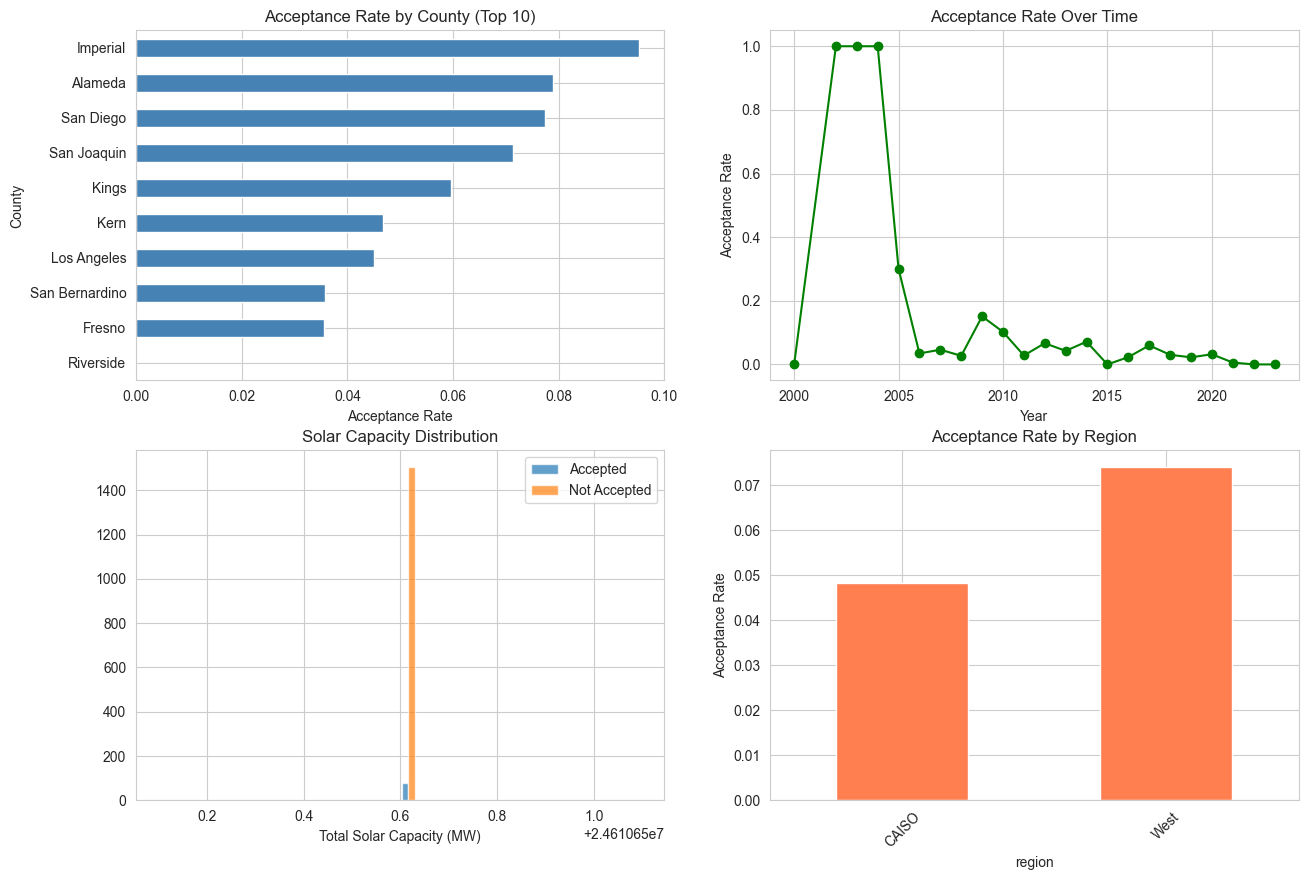

In [140]:
model_df = solar_df[solar_df['acceptance_status'].isin(['Accepted_Within_5Years', 'Not_Accepted'])].copy()
model_df['target'] = (model_df['acceptance_status'] == 'Accepted_Within_5Years').astype(int)

print(f"\nModeling dataset size: {len(model_df)}")
print(f"Acceptance rate: {model_df['target'].mean():.2%}")

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Acceptance by County
top_counties = model_df['County'].value_counts().head(10).index
county_acceptance = model_df[model_df['County'].isin(top_counties)].groupby('County')['target'].mean().sort_values()
county_acceptance.plot(kind='barh', ax=axes[0, 0], color='steelblue')
axes[0, 0].set_title('Acceptance Rate by County (Top 10)')
axes[0, 0].set_xlabel('Acceptance Rate')

# 2. Acceptance by Year
year_acceptance = model_df.groupby('q_year')['target'].agg(['mean', 'count'])
axes[0, 1].plot(year_acceptance.index, year_acceptance['mean'], marker='o', color='green')
axes[0, 1].set_title('Acceptance Rate Over Time')
axes[0, 1].set_ylabel('Acceptance Rate')
axes[0, 1].set_xlabel('Year')

#3
axes[1, 0].hist([model_df[model_df['target']==1]['total_solar_cap'].dropna(),
                 model_df[model_df['target']==0]['total_solar_cap'].dropna()],
                bins=30, label=['Accepted', 'Not Accepted'], alpha=0.7)
axes[1, 0].set_title('Solar Capacity Distribution')
axes[1, 0].set_xlabel('Total Solar Capacity (MW)')
axes[1, 0].legend()

# 4. Region Distribution
region_acceptance = model_df.groupby('region')['target'].agg(['mean', 'count'])
region_acceptance['mean'].plot(kind='bar', ax=axes[1, 1], color='coral')
axes[1, 1].set_title('Acceptance Rate by Region')
axes[1, 1].set_ylabel('Acceptance Rate')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.show()

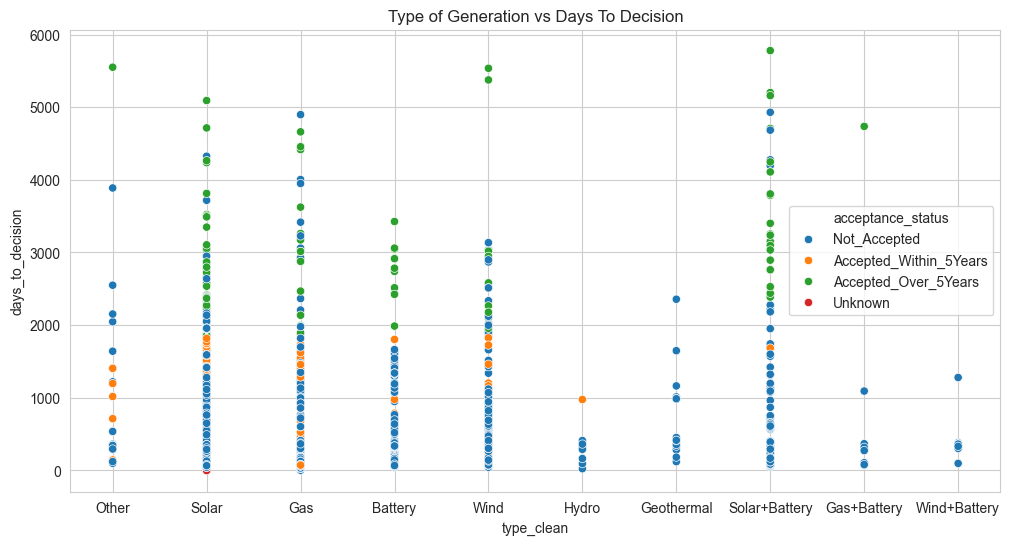

In [157]:
top_types = solar_df['type_clean'].value_counts().head(10).index.tolist()
df_top = solar_df[solar_df['type_clean'].isin(top_types)]
sns.scatterplot(
    data=df_top, 
    x='type_clean', 
    y='days_to_decision', 
    hue='acceptance_status'
)
plt.title("Type of Generation vs Days To Decision")
plt.show()


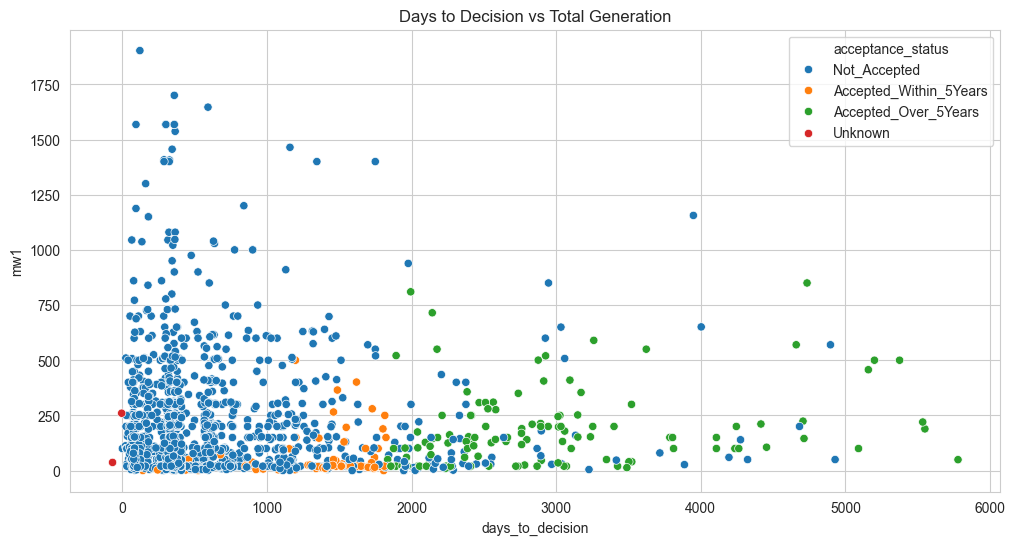

In [154]:
generation_req = solar_df[solar_df['project_type'] == "Generation"]
sns.scatterplot(
    data=generation_req, 
    x='days_to_decision', 
    y='mw1', 
    hue='acceptance_status'
)
plt.title("Days to Decision vs Total Generation")
plt.show()